## Results of the Median Imputation Data
<hr/>

</h3>We considered the data which has Median imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> What are MAPE and MAE scores of train and test data </li>
    <li> Levraging SARIMA models to capture seasonal difference </li>
</ul>
    

In [1]:
import pandas as pd
import numpy as np
import joblib
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df1 = pd.read_csv("../../../../main/sub_data/single_variant/median/sin_ndlc_psp_median.csv",index_col='Date',parse_dates=True)
# Reading the First Difference Data
df2 = pd.read_csv("../../../../main/sub_data/single_variant/median/sin_ndlc_psp_median_diff1.csv",index_col='Date',parse_dates=True)
# Reading the Second Difference Data
df3 = pd.read_csv("../../../../main/sub_data/single_variant/median/sin_ndlc_psp_median_diff2.csv",index_col='Date',parse_dates=True)

In [3]:
df1 = df1.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)
df1

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0
...,...
2023-05-27,5051.0
2023-05-28,4780.0
2023-05-29,4782.0


In [4]:
df2.head()

,Max.Demand met during the day (MW)
Date,
2013-04-02,258.0
2013-04-03,-43.0
2013-04-04,134.0
2013-04-05,35.0
2013-04-06,-7.0


In [5]:
df3.head()

,Max.Demand met during the day (MW)
Date,
2013-04-03,-301.0
2013-04-04,177.0
2013-04-05,-99.0
2013-04-06,-42.0
2013-04-07,-91.0


## We first Divide our data into train and Test data

In [6]:
df1_train = df1.loc[:'2023-04-30']
df1_test = df1.loc['2023-05-01':]
df1_train.to_csv("../../../../main/sub_data/single_variant/median/train/train_median.csv")
df1_test.to_csv("../../../../main/sub_data/single_variant/median/test/test_median.csv")

## AR(1) model according to the ACF and PACF plots

In [7]:
def get_MAPE_MAE_test(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(pd.DataFrame(results.forecast(len(actual_values)))["predicted_mean"])
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE

def get_MAPE_MAE(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(results.fittedvalues)
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE



In [8]:
ar1_model = ARIMA(df1_train,order=(1,0,0))
ar1_results = ar1_model.fit()
print(ar1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 0, 0)   Log Likelihood              -26087.275
Date:                                Sat, 15 Jul 2023   AIC                          52180.550
Time:                                        09:34:06   BIC                          52199.184
Sample:                                    04-01-2013   HQIC                         52187.183
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4348.0124    110.508     39.346      0.000    4131.421    4564.603
ar.

In [9]:
get_MAPE_MAE_test(df1_test,ar1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar1_results)

The MAPE Score is :  19.203384343740474
The MAE Score is : 198.1681116962822
------------------------------------------------------------
The MAPE Score is :  25.740285411767008
The MAE Score is : 198.1681116962822


(25.740285411767008, 198.1681116962822)

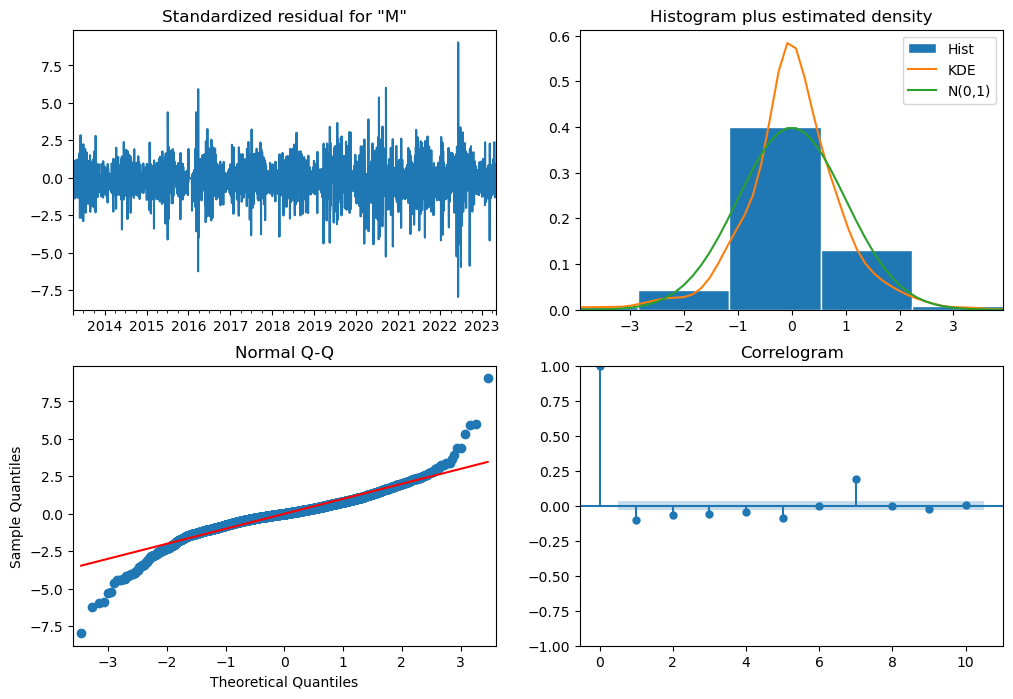

In [10]:
ar1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [11]:
ar2_model = ARIMA(df1_train,order=(2,0,0))
ar2_results = ar2_model.fit()
print(ar2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(2, 0, 0)   Log Likelihood              -26067.490
Date:                                Sat, 15 Jul 2023   AIC                          52142.980
Time:                                        09:34:08   BIC                          52167.825
Sample:                                    04-01-2013   HQIC                         52151.824
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4348.0124    127.461     34.112      0.000    4098.193    4597.832
ar.

In [12]:
get_MAPE_MAE_test(df1_test,ar2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar2_results)

The MAPE Score is :  19.363044015717794
The MAE Score is : 198.75883826518557
------------------------------------------------------------
The MAPE Score is :  25.748118363617557
The MAE Score is : 198.75883826518557


(25.748118363617557, 198.75883826518557)

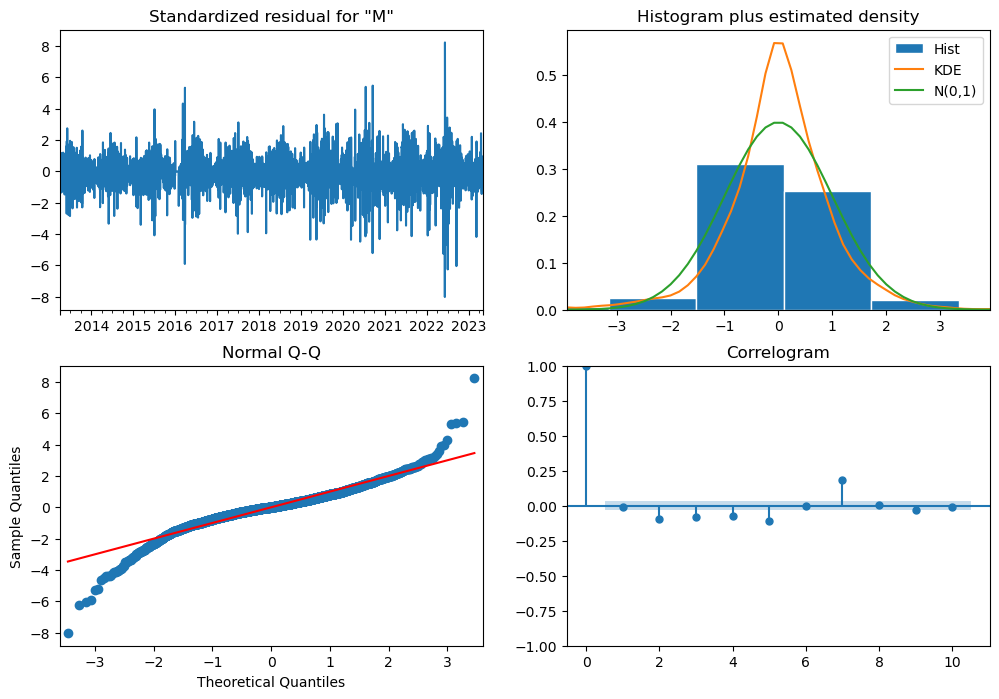

In [13]:
ar2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [14]:
ar3_model = ARIMA(df1_train,order=(1,1,0))
ar3_results = ar3_model.fit()
print(ar3_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(1, 1, 0)   Log Likelihood              -26091.695
Date:                                Sat, 15 Jul 2023   AIC                          52187.390
Time:                                        09:34:09   BIC                          52199.812
Sample:                                    04-01-2013   HQIC                         52191.812
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1229      0.009    -13.068      0.000      -0.141      -0.104
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.63691565834284
The MAE Score is : 200.37174272367378
------------------------------------------------------------
The MAPE Score is :  26.268719851461444
The MAE Score is : 200.37174272367378


(26.268719851461444, 200.37174272367378)

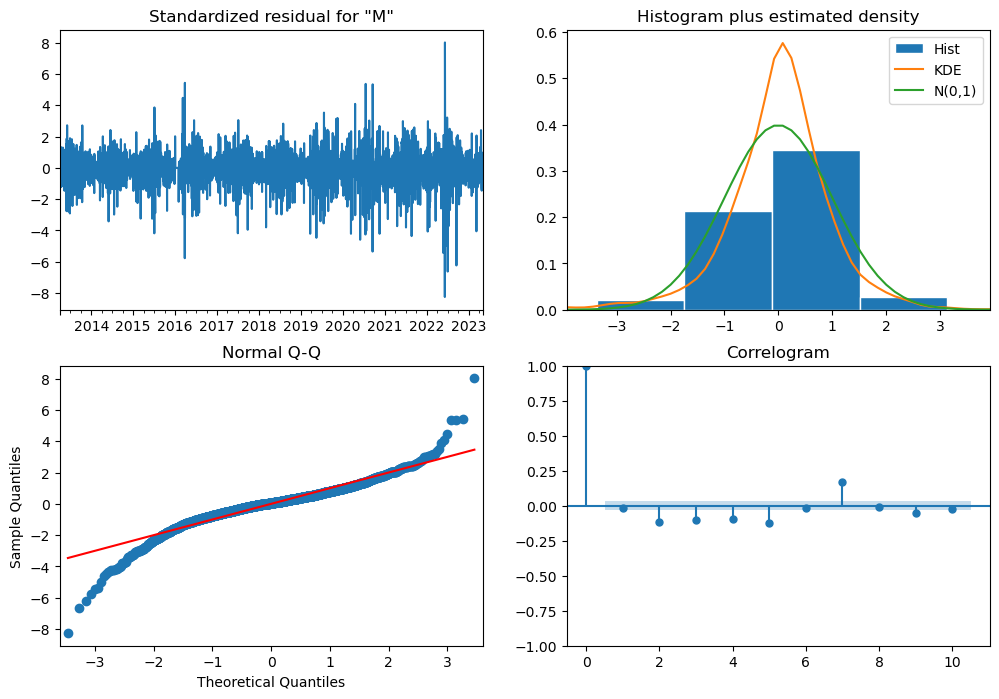

In [16]:
ar3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [17]:
ar4_model = ARIMA(df1,order=(1,2,0))
ar4_results = ar4_model.fit()
print(ar4_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3713
Model:                                 ARIMA(1, 2, 0)   Log Likelihood              -27261.956
Date:                                Sat, 15 Jul 2023   AIC                          54527.913
Time:                                        09:34:11   BIC                          54540.351
Sample:                                    04-01-2013   HQIC                         54532.338
                                         - 05-31-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5139      0.008    -62.481      0.000      -0.530      -0.498
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
get_MAPE_MAE_test(df1_test,ar4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar4_results)

The MAPE Score is :  86.20133302416914
The MAE Score is : 260.02407181863714
------------------------------------------------------------
The MAPE Score is :  27.038548471710534
The MAE Score is : 260.02407181863714


(27.038548471710534, 260.02407181863714)

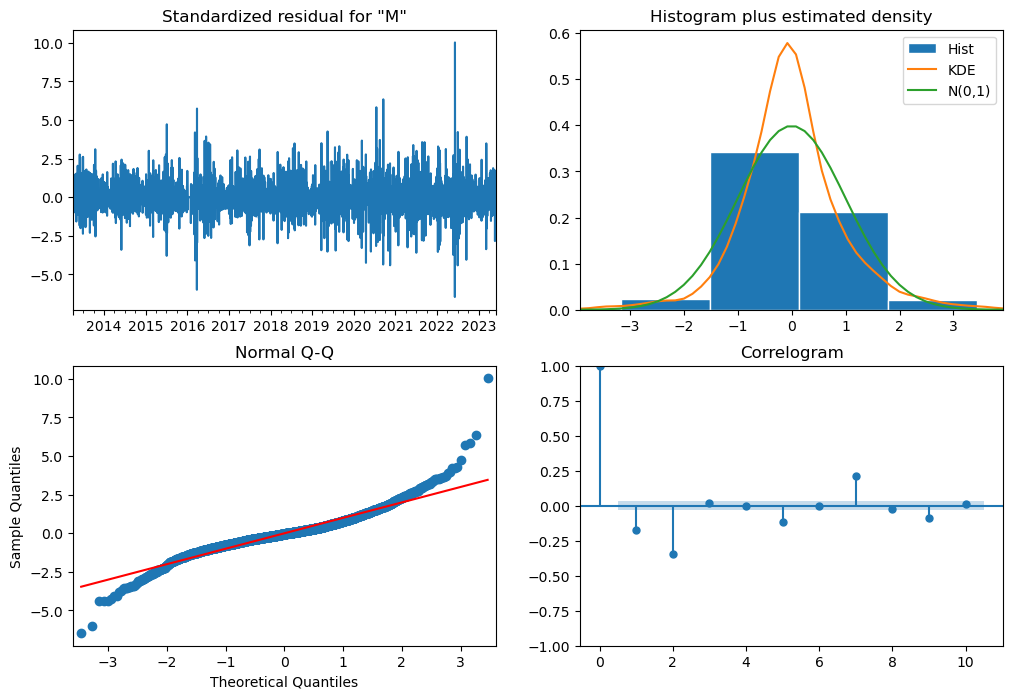

In [19]:
ar4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [20]:
ma1_model = ARIMA(df1_train,order=(0,0,1))
ma1_results = ma1_model.fit()
print(ma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 0, 1)   Log Likelihood              -28797.471
Date:                                Sat, 15 Jul 2023   AIC                          57600.941
Time:                                        09:34:14   BIC                          57619.575
Sample:                                    04-01-2013   HQIC                         57607.574
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4347.9582     19.116    227.451      0.000    4310.491    4385.425
ma.

In [21]:
get_MAPE_MAE_test(df1_test,ma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma1_results)

The MAPE Score is :  16.646727769959124
The MAE Score is : 492.2047527090378
------------------------------------------------------------
The MAPE Score is :  21.271869317538375
The MAE Score is : 492.2047527090378


(21.271869317538375, 492.2047527090378)

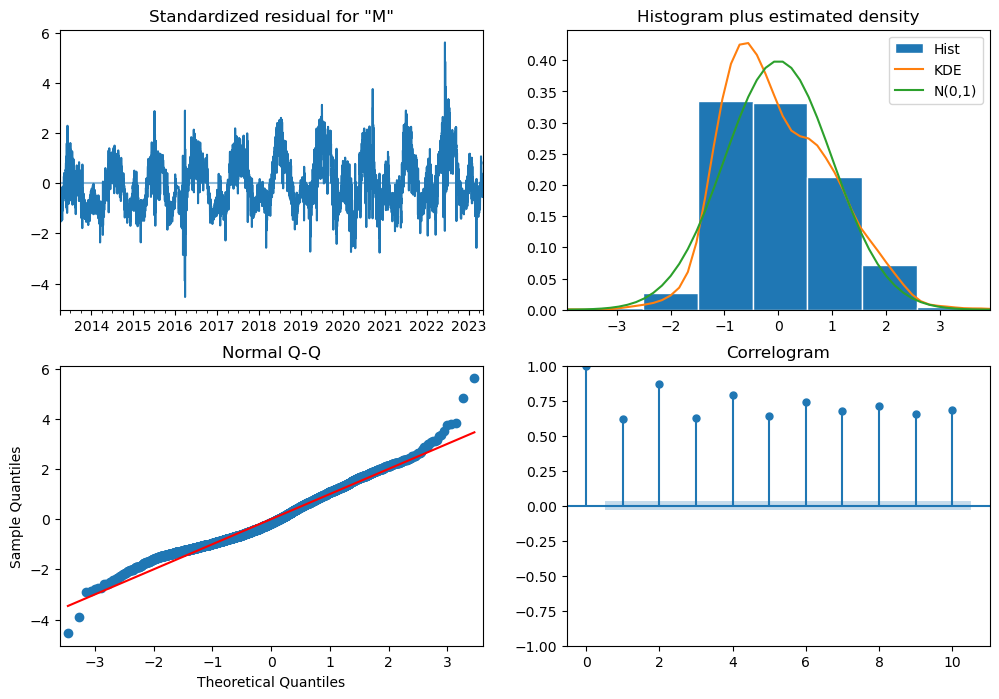

In [22]:
ma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [23]:
ma2_model = ARIMA(df1_train,order=(0,1,1))
ma2_results = ma2_model.fit()
print(ma2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 1, 1)   Log Likelihood              -26083.291
Date:                                Sat, 15 Jul 2023   AIC                          52170.583
Time:                                        09:34:16   BIC                          52183.005
Sample:                                    04-01-2013   HQIC                         52175.005
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1634      0.010    -16.827      0.000      -0.182      -0.144
sig

In [24]:
get_MAPE_MAE_test(df1_test,ma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma2_results)

The MAPE Score is :  21.336932939676306
The MAE Score is : 200.9035132198343
------------------------------------------------------------
The MAPE Score is :  26.241613917059308
The MAE Score is : 200.9035132198343


(26.241613917059308, 200.9035132198343)

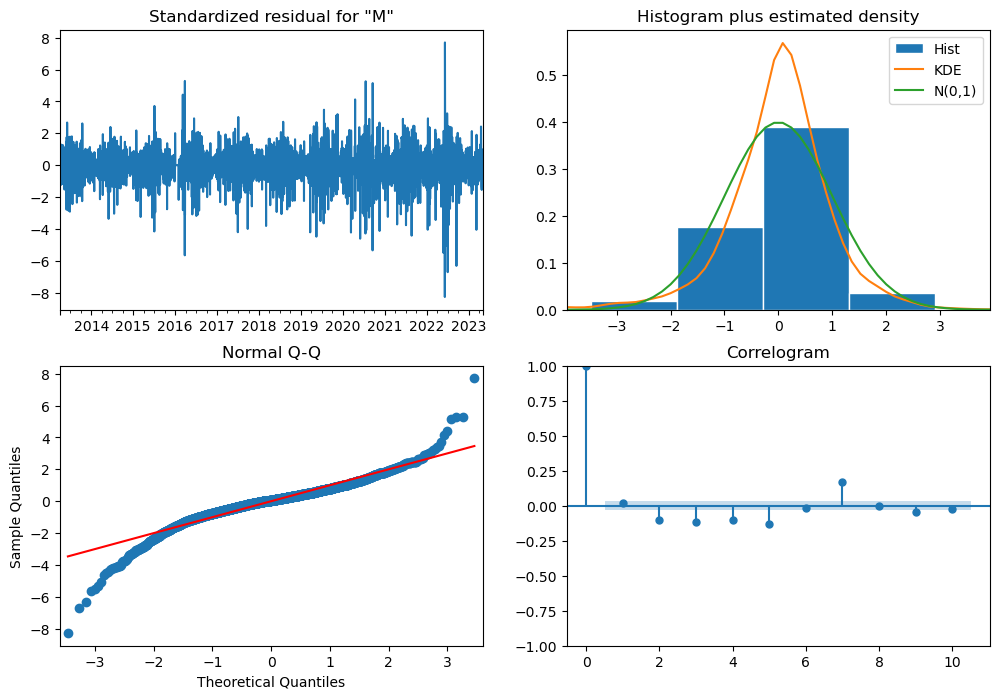

In [25]:
ma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [26]:
ma3_model = ARIMA(df1_train,order=(0,2,1))
ma3_results = ma3_model.fit()
print(ma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(0, 2, 1)   Log Likelihood              -26117.972
Date:                                Sat, 15 Jul 2023   AIC                          52239.944
Time:                                        09:34:18   BIC                          52252.365
Sample:                                    04-01-2013   HQIC                         52244.366
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.011    -90.055      0.000      -1.021      -0.978
sig

In [27]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.63691565834284
The MAE Score is : 200.37174272367378
------------------------------------------------------------
The MAPE Score is :  26.268719851461444
The MAE Score is : 200.37174272367378


(26.268719851461444, 200.37174272367378)

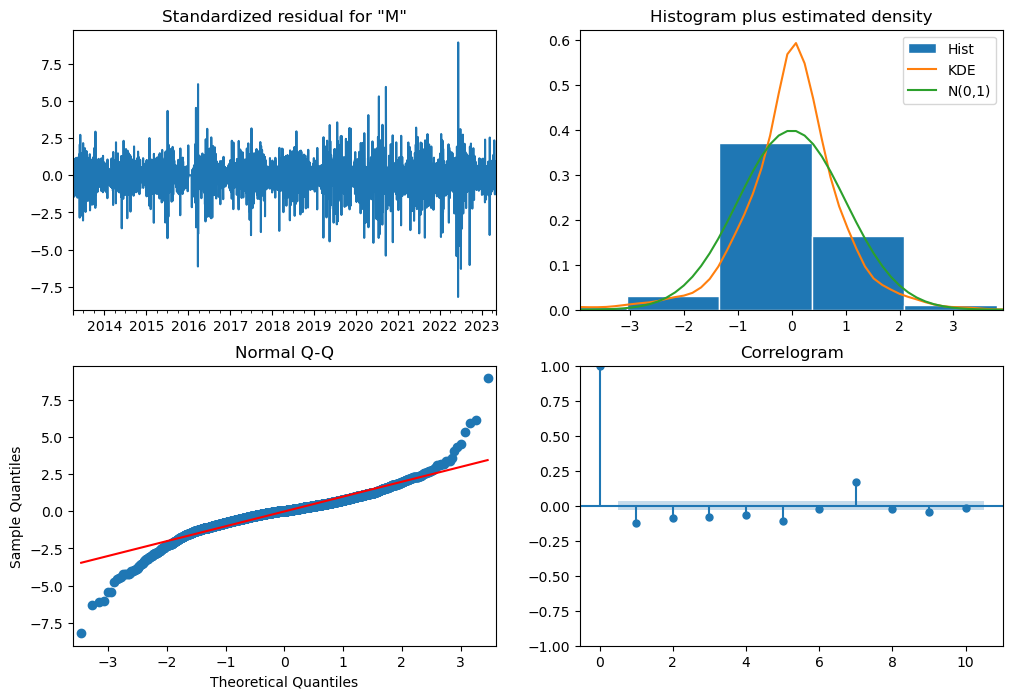

In [28]:
ma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

## ARMA Models through AIC and BIC scores

In [29]:
# arma_results1 = []
# for p in range(10):
#     for q in range(10):
#         try:
#             results = ARIMA(df1,order=(p,0,q)).fit()
#             arma_results1.append((p,q,results.aic,results.bic))
#         except:
#             arma_results1.append((p,q,None,None))
arma_results1 = pd.read_csv("arma_results1.csv")

In [30]:
arma_results1 = pd.DataFrame(arma_results1,columns=['p','q','AIC','BIC'])
arma_results1.sort_values('AIC')

,p,q,AIC,BIC
98,9,8,52093.591451,52211.763765
88,8,8,52122.655819,52234.608537
89,8,9,52126.554950,52244.727263
99,9,9,52141.366842,52265.758751
97,9,7,52160.453266,52272.405984
...,...,...,...,...
4,0,4,54320.931580,54358.249152
3,0,3,55177.866005,55208.963982
2,0,2,56053.606961,56078.485343
1,0,1,58087.550525,58106.209311


In [31]:
arma_results1.to_csv("arma_results1.csv")
arma_results1.sort_values('BIC')

,p,q,AIC,BIC
98,9,8,52093.591451,52211.763765
88,8,8,52122.655819,52234.608537
89,8,9,52126.554950,52244.727263
99,9,9,52141.366842,52265.758751
97,9,7,52160.453266,52272.405984
...,...,...,...,...
4,0,4,54320.931580,54358.249152
3,0,3,55177.866005,55208.963982
2,0,2,56053.606961,56078.485343
1,0,1,58087.550525,58106.209311


In [32]:
arma1_results = ARIMA(df1_train,order=(9,0,8)).fit()
print(arma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 0, 8)   Log Likelihood              -25798.870
Date:                                Sat, 15 Jul 2023   AIC                          51635.740
Time:                                        09:37:40   BIC                          51753.753
Sample:                                    04-01-2013   HQIC                         51677.749
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4348.0125    904.883      4.805      0.000    2574.474    6121.551
ar.

In [33]:
get_MAPE_MAE_test(df1_test,arma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma1_results)

The MAPE Score is :  18.28847542395933
The MAE Score is : 180.30723513455612
------------------------------------------------------------
The MAPE Score is :  26.032700096128785
The MAE Score is : 180.30723513455612


(26.032700096128785, 180.30723513455612)

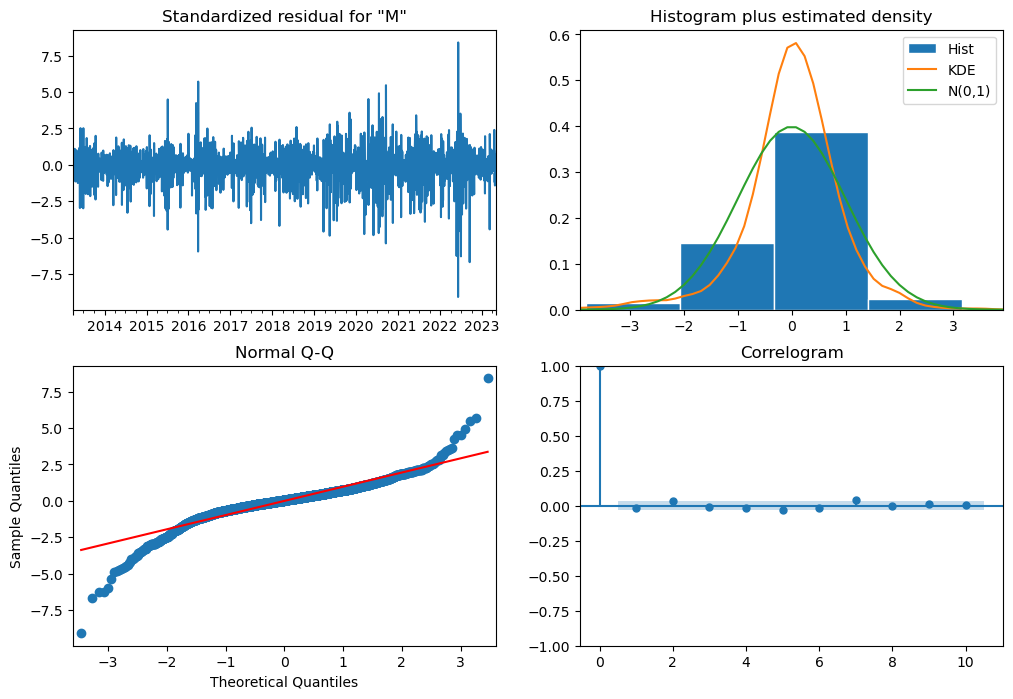

In [34]:
arma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [35]:
arma2_results = ARIMA(df1_train,order=(9,1,8)).fit()
print(arma2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(9, 1, 8)   Log Likelihood              -25822.943
Date:                                Sat, 15 Jul 2023   AIC                          51681.885
Time:                                        09:42:33   BIC                          51793.682
Sample:                                    04-01-2013   HQIC                         51721.682
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4430      0.120      3.702      0.000       0.208       0.678
ar.

In [36]:
get_MAPE_MAE_test(df1_test,arma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma2_results)

The MAPE Score is :  18.115281686345355
The MAE Score is : 184.5130911232482
------------------------------------------------------------
The MAPE Score is :  26.121922928624635
The MAE Score is : 184.5130911232482


(26.121922928624635, 184.5130911232482)

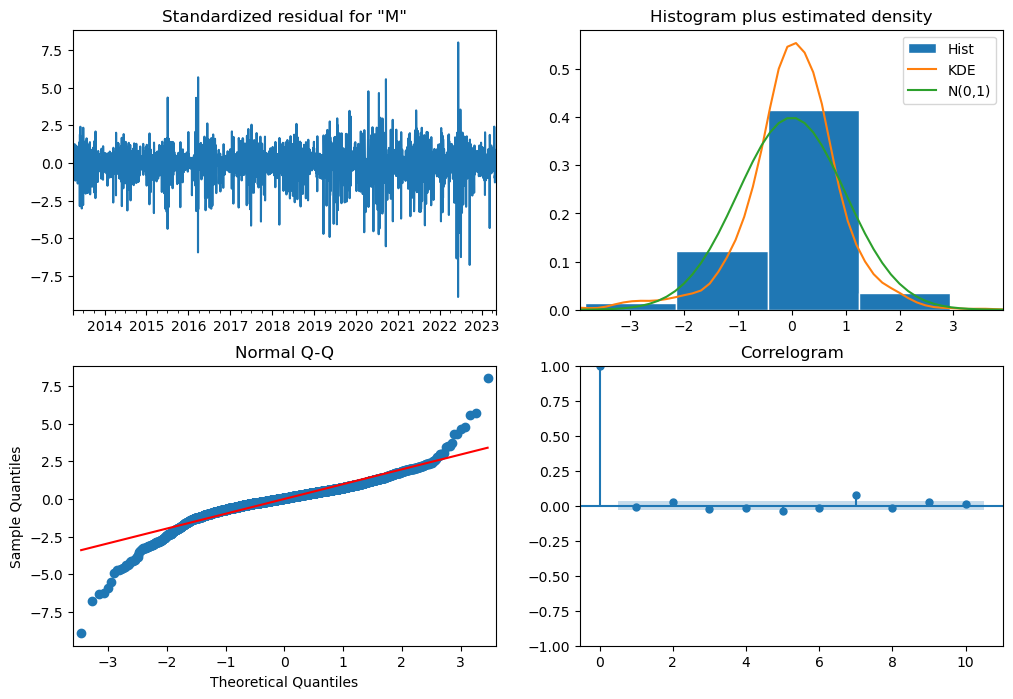

In [37]:
arma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [38]:
arma3_results = ARIMA(df1_train,order=(8,0,8)).fit()
print(arma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 0, 8)   Log Likelihood              -25819.200
Date:                                Sat, 15 Jul 2023   AIC                          51674.400
Time:                                        09:47:12   BIC                          51786.202
Sample:                                    04-01-2013   HQIC                         51714.198
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4348.0125    581.750      7.474      0.000    3207.803    5488.222
ar.

In [39]:
get_MAPE_MAE_test(df1_test,arma3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma3_results)

The MAPE Score is :  18.50671880666534
The MAE Score is : 181.70179433844072
------------------------------------------------------------
The MAPE Score is :  25.95828172627258
The MAE Score is : 181.70179433844072


(25.95828172627258, 181.70179433844072)

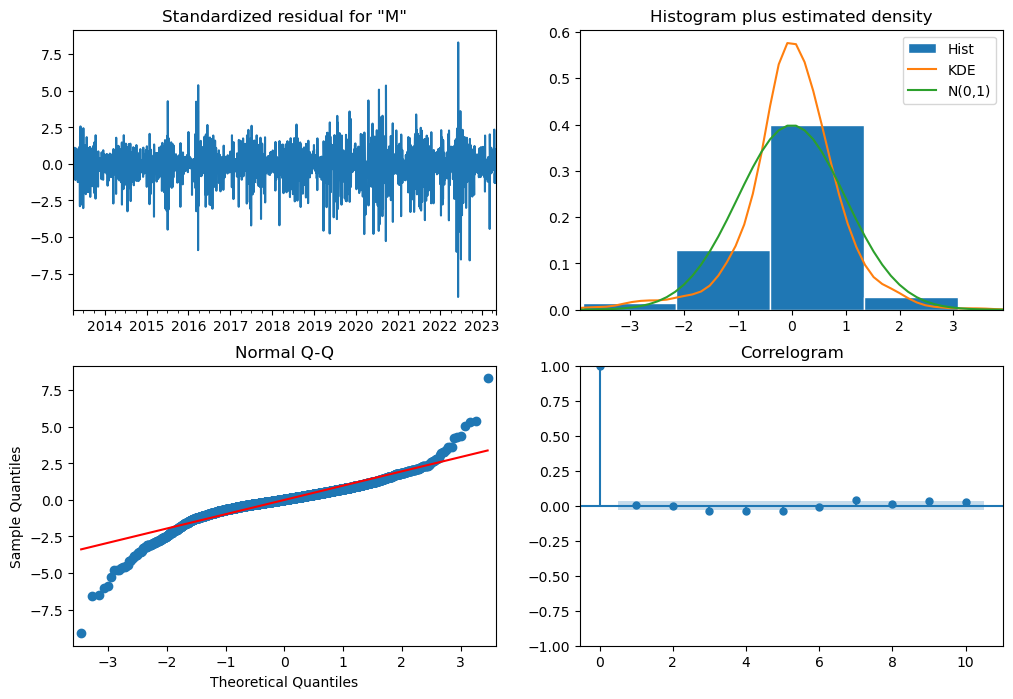

In [40]:
arma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [41]:
arma4_results = ARIMA(df1_train,order=(8,1,8)).fit()
print(arma4_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 1, 8)   Log Likelihood              -25803.539
Date:                                Sat, 15 Jul 2023   AIC                          51641.077
Time:                                        09:50:59   BIC                          51746.663
Sample:                                    04-01-2013   HQIC                         51678.663
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2498      0.506      0.494      0.621      -0.741       1.241
ar.

In [42]:
get_MAPE_MAE_test(df1_test,arma4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma4_results)

The MAPE Score is :  18.421855497373713
The MAE Score is : 181.12284895858446
------------------------------------------------------------
The MAPE Score is :  26.104136981899046
The MAE Score is : 181.12284895858446


(26.104136981899046, 181.12284895858446)

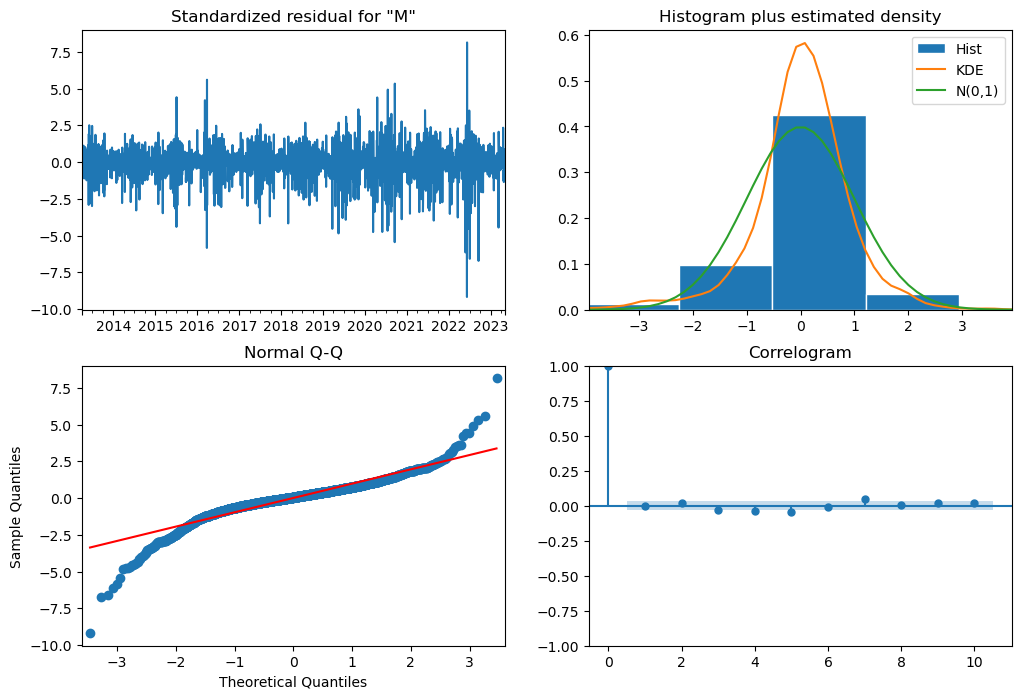

In [43]:
arma4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [44]:
arma5_results = ARIMA(df1_train,order=(8,0,9)).fit()
print(arma5_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 0, 9)   Log Likelihood              -25815.340
Date:                                Sat, 15 Jul 2023   AIC                          51668.680
Time:                                        09:55:42   BIC                          51786.693
Sample:                                    04-01-2013   HQIC                         51710.689
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4348.0125    491.962      8.838      0.000    3383.784    5312.241
ar.

In [45]:
get_MAPE_MAE_test(df1_test,arma5_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma5_results)

The MAPE Score is :  18.407260736690695
The MAE Score is : 182.12878057609075
------------------------------------------------------------
The MAPE Score is :  25.93970509878411
The MAE Score is : 182.12878057609075


(25.93970509878411, 182.12878057609075)

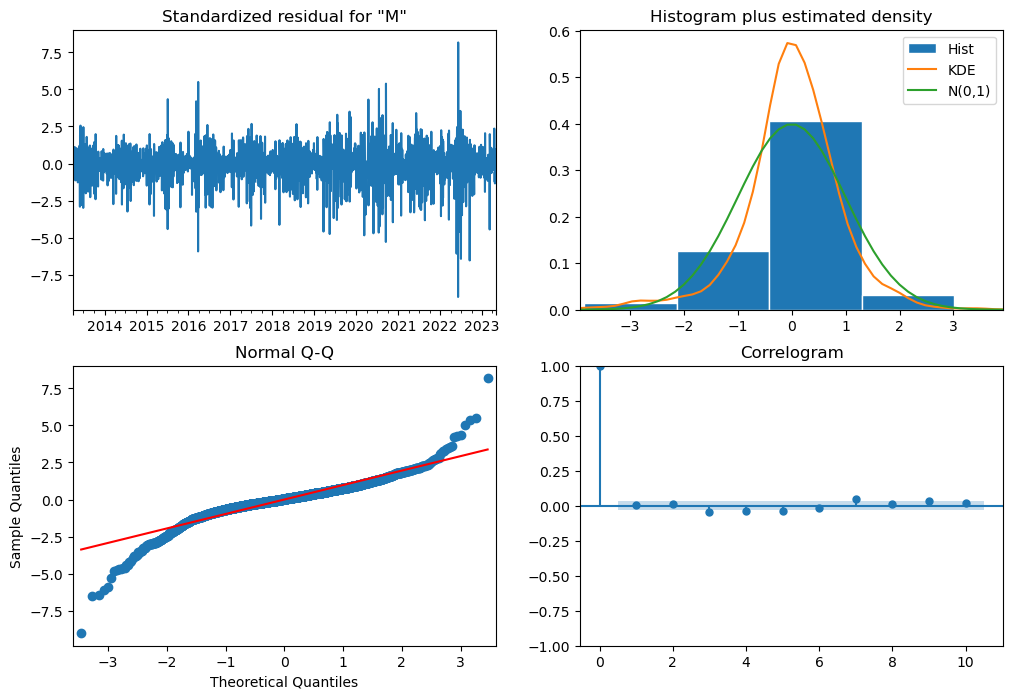

In [46]:
arma5_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [47]:
arma6_results = ARIMA(df1_train,order=(8,1,9)).fit()
print(arma6_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                                 ARIMA(8, 1, 9)   Log Likelihood              -25832.769
Date:                                Sat, 15 Jul 2023   AIC                          51701.538
Time:                                        09:59:41   BIC                          51813.335
Sample:                                    04-01-2013   HQIC                         51741.335
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4608      0.155      2.969      0.003       0.157       0.765
ar.

In [48]:
get_MAPE_MAE_test(df1_test,arma6_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma6_results)

The MAPE Score is :  18.502907443344668
The MAE Score is : 184.4183243349128
------------------------------------------------------------
The MAPE Score is :  26.15258642858782
The MAE Score is : 184.4183243349128


(26.15258642858782, 184.4183243349128)

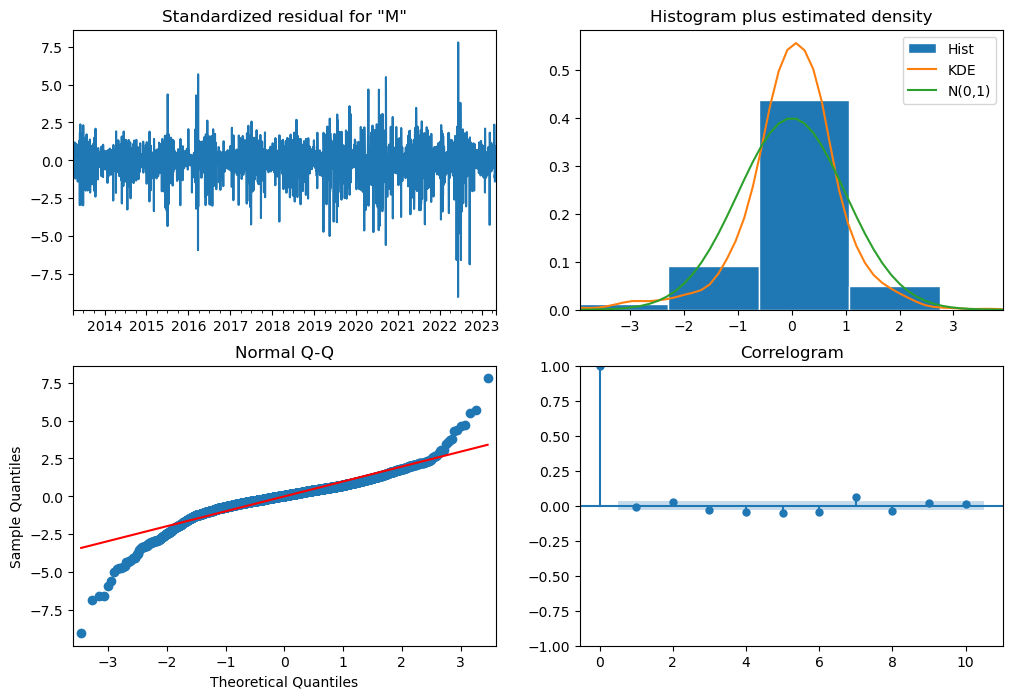

In [49]:
arma6_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [50]:
# Create auto_arima model
model1 = pm.auto_arima(df1_train,
                      seasonal=True, 
                      error_action='ignore',
                      suppress_warnings=True)

# Create auto_arima model
model2 = pm.auto_arima(df1_train,
                      seasonal=False, 
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())
print(model2.summary())



/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  ret

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3682
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -25893.888
Date:                Sat, 15 Jul 2023   AIC                          51805.777
Time:                        10:29:09   BIC                          51861.675
Sample:                    04-01-2013   HQIC                         51825.675
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1490      0.032      4.679      0.000       0.087       0.211
ar.L2         -0.7283      0.023    -31.537      0.000      -0.774      -0.683
ar.L3          0.4630      0.043     10.676      0.0

In [51]:
model1 = ARIMA(df1_train,order=(5,1,3)).fit()

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/

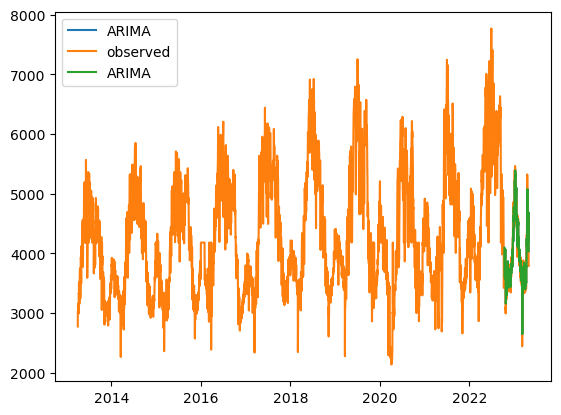

In [52]:
# Create ARIMA mean forecast
arima_pred = model1.get_prediction(start=-200)
arima_mean = arima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.plot(df1_train.index,df1_train["Max.Demand met during the day (MW)"], label='observed')
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.legend()
plt.show()

In [53]:
get_MAPE_MAE_test(df1_test,model1)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,model1)

The MAPE Score is :  18.67618762729141
The MAE Score is : 190.1639362852256
------------------------------------------------------------
The MAPE Score is :  26.098423284644515
The MAE Score is : 190.1639362852256


(26.098423284644515, 190.1639362852256)